<a href="https://colab.research.google.com/github/AI-ML-DL-EXPERT/Car-Price-Predictor-Using-DL/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

## Importing the Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Deep_Learning_Datasets/Car-price-Dataset.csv")

df.sample(3)

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
5926,5926,Toyota,Duet,630000,2006,Punjab,151000,Petrol,1000,Maroon,Imported,Hatchback,Automatic,Registered
8963,8963,Toyota,Corolla,2390000,2016,Punjab,58000,Petrol,1300,White,Local,Sedan,Automatic,Registered
9211,9211,Toyota,Aqua,2800000,2015,KPK,48000,Petrol,1500,Black,Imported,Hatchback,Automatic,Registered


## Simple Preprocessing the Dataset

In [3]:
# Removing the first unnamed column

df = df.iloc[:, 1:]

In [4]:
df.sample(3)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
7810,Suzuki,Alto,660000,2010,Sindh,120000,Petrol,1000,Blue,Local,Hatchback,Manual,Registered
45384,Honda,City,2215000,2017,Punjab,41000,Petrol,1300,White,Local,Sedan,Manual,Registered
25644,Honda,Vezel,3650000,2014,Islamabad,35000,Petrol,1500,Silver,Imported,Cross Over,Automatic,Un-Registered


In [5]:
df.shape

(46022, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Price                46022 non-null  int64 
 3   Model Year           46022 non-null  int64 
 4   Location             46022 non-null  object
 5   Mileage              46022 non-null  int64 
 6   Engine Type          46022 non-null  object
 7   Engine Capacity      46022 non-null  int64 
 8   Color                46022 non-null  object
 9   Assembly             46022 non-null  object
 10  Body Type            46022 non-null  object
 11  Transmission Type    46022 non-null  object
 12  Registration Status  46022 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


In [7]:
df.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [8]:
df.head(2)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered


In [9]:
# Checking for duplicated values in the dataset

df.duplicated().sum()

815

In [10]:
# Checking the Percentage of Duplicated Values

(df.duplicated().sum()/ df.shape[0]) * 100

1.770892181999913

In [11]:
df.shape[0]

46022

In [12]:
# Removing the duplicated values

df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.head(3)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered


# **EDA**

## Column Details :-

**Price:** The price range of the cars, with specific price labels and counts.

**Company Name:** The name of the car manufacturing company, with percentages of each company's representation.

**Model Name:** The model name of the cars, with percentages of each model's representation.

**Model Year:** The range of car manufacturing years, with counts and percentages.

**Location:** The location of the cars, specifying the regions where they are available for purchase, along with their percentages.

**Mileage:** Information on the mileage of the cars, with mileage ranges, counts, and percentages.

**Engine Type:** Descriptions of the engine types, with percentages for each type.

**Engine Capacity:** Engine capacity ranges with counts and percentages.

**Color:** The color distribution of the cars, with percentages for each color.

In [15]:
df.head(3)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered


### **Company Name :-**

1.) Approximately 90% of the Data is of Toyota, Suzuki, Honda and Daihatsu Companies

2.) The cars whose quantity is less then 100 should be removed from the dataset

In [16]:
# Number of Unique companies

print(df["Company Name"].unique())

print("\n\nNumber of Unique companies :- ", len(df["Company Name"].unique()))

['Toyota' 'Suzuki' 'Honda' 'Mitsubishi' 'Nissan' 'Daihatsu' 'Audi'
 'Chevrolet' 'Mercedes' 'Hyundai' 'Daewoo' 'BMW' 'FAW' 'Range' 'DFSK'
 'KIA' 'Lexus' 'United' 'SsangYong' 'Mazda' 'Subaru' 'Porsche' 'Chery'
 'Fiat' 'Land' 'MINI' 'Hummer' 'Jeep' 'Jaguar' 'Adam' 'Volvo']


Number of Unique companies :-  31


In [17]:
companiesFilter = df["Company Name"].value_counts()[(df["Company Name"].value_counts() > 100).values]

In [18]:
companiesFilter.index

Index(['Suzuki', 'Toyota', 'Honda', 'Daihatsu', 'Nissan', 'Mitsubishi',
       'Mercedes', 'Hyundai', 'Audi', 'FAW', 'BMW', 'Mazda'],
      dtype='object')

In [19]:
# Filter the companies which are greater then 100

df = df[df["Company Name"].isin(companiesFilter.index)]

In [20]:
df.shape

(44740, 13)

In [21]:
df["Company Name"].value_counts()

Suzuki        15555
Toyota        15352
Honda          9091
Daihatsu       2242
Nissan          569
Mitsubishi      492
Mercedes        435
Hyundai         356
Audi            206
FAW             187
BMW             137
Mazda           118
Name: Company Name, dtype: int64

In [22]:
numOfCompanies = df["Company Name"].value_counts()

In [23]:
numOfCompanies.index

Index(['Suzuki', 'Toyota', 'Honda', 'Daihatsu', 'Nissan', 'Mitsubishi',
       'Mercedes', 'Hyundai', 'Audi', 'FAW', 'BMW', 'Mazda'],
      dtype='object')

In [24]:
numOfCompanies.values

array([15555, 15352,  9091,  2242,   569,   492,   435,   356,   206,
         187,   137,   118])

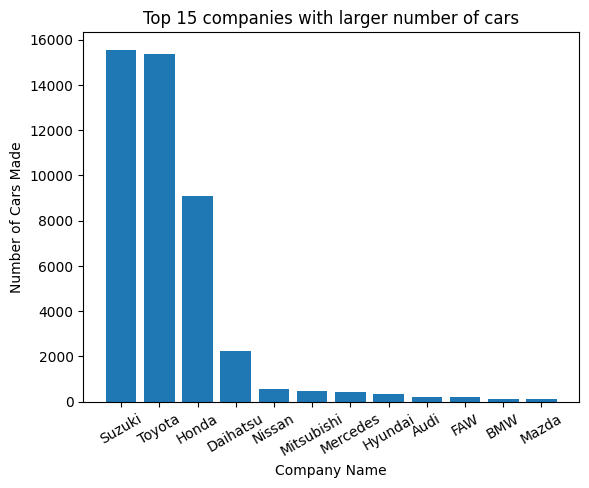

In [25]:
plt.bar(numOfCompanies.index, numOfCompanies.values)
plt.xticks(rotation = 30)
plt.title("Top 15 companies with larger number of cars")
plt.xlabel("Company Name")
plt.ylabel("Number of Cars Made")
plt.show()

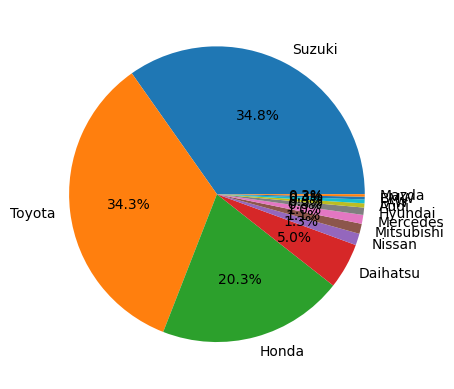

In [26]:
plt.pie(numOfCompanies.values, labels=numOfCompanies.index, autopct = "%0.1f%%")
plt.show()

## Model Name: -

1.) The Data is somewhat evenly distributed

In [27]:
# Number of Model Name

print(df["Model Name"].value_counts() )

print("\n\nNumber of Unique companies :- ", len(df["Model Name"].value_counts()))

Corolla    8058
Mehran     4634
Civic      4130
Cultus     3537
City       3059
           ... 
Wake          1
FX            1
Auris         1
Blue          1
Ractis        1
Name: Model Name, Length: 161, dtype: int64


Number of Unique companies :-  161


In [28]:
modelFilter = df["Model Name"].value_counts()[(df["Model Name"].value_counts() > 100).values]

In [29]:
modelFilter.index

Index(['Corolla', 'Mehran', 'Civic', 'Cultus', 'City', 'Alto', 'Vitz', 'Wagon',
       'Aqua', 'Vezel', 'Bolan', 'Swift', 'Mira', 'Prius', 'Prado', 'Passo',
       'Cuore', 'Land', 'Benz', 'Khyber', 'Santro', 'Move', 'N', 'Baleno',
       'Liana', 'Fortuner', 'Premio', 'Hijet', 'Margalla', 'Fit', 'Accord',
       'Surf', 'Pajero', 'Belta', 'X-PV', 'Ek', 'Lancer', 'Dayz', 'Mark'],
      dtype='object')

In [30]:
# Filter the companies whose model name count is greater then 100

df = df[df["Model Name"].isin(modelFilter.index)]

In [31]:
df.shape

(42162, 13)

In [32]:
df["Model Name"].value_counts()

Corolla     8058
Mehran      4634
Civic       4130
Cultus      3537
City        3059
Alto        2502
Vitz        1803
Wagon       1718
Aqua        1103
Vezel       1016
Bolan        931
Swift        879
Mira         820
Prius        797
Prado        796
Passo        772
Cuore        706
Land         487
Benz         435
Khyber       344
Santro       343
Move         300
N            297
Baleno       270
Liana        226
Fortuner     218
Premio       211
Hijet        194
Margalla     192
Fit          189
Accord       174
Surf         163
Pajero       138
Belta        128
X-PV         127
Ek           125
Lancer       124
Dayz         110
Mark         106
Name: Model Name, dtype: int64

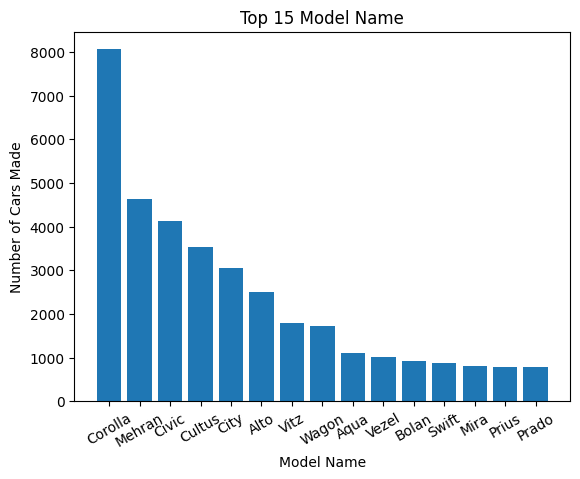

In [33]:
plt.bar(df["Model Name"].value_counts().index[:15], df["Model Name"].value_counts().values[:15])
plt.xticks(rotation = 30)
plt.title("Top 15 Model Name")
plt.xlabel("Model Name")
plt.ylabel("Number of Cars Made")
plt.show()

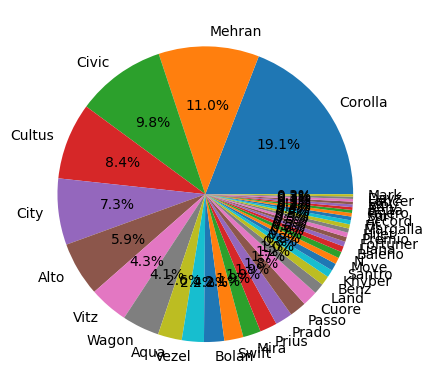

In [34]:
plt.pie(df["Model Name"].value_counts().values, labels=df["Model Name"].value_counts().index, autopct = "%0.1f%%")
plt.show()

## Price: -

1.) The price is strongly correlated with Engine Capacity.

2.) The price is also correlated with the Model Year of the car.

3.) Most of it's values lies in the centre, it is kindof normally distributed.

In [35]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Model Year,Mileage,Engine Capacity
Price,1.000000,0.219344,-0.185998,0.668597
Model Year,0.219344,1.000000,-0.601255,-0.140032
Mileage,-0.185998,-0.601255,1.000000,0.091693
Engine Capacity,0.668597,-0.140032,0.091693,1.000000


(-10000000.0, 10000000.0)

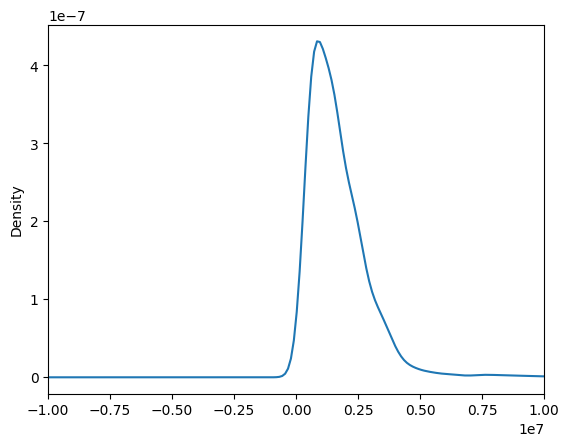

In [36]:
df["Price"].plot.kde()
plt.xlim(-0.1e8, 0.1e8)

In [37]:
df["Price"].skew()

8.345325583507057

In [38]:
df["Price"].std()

2737940.0523351547

In [39]:
df["Price"].describe()

count    4.216200e+04
mean     1.946522e+06
std      2.737940e+06
min      1.110000e+05
25%      8.250000e+05
50%      1.450000e+06
75%      2.275000e+06
max      5.850000e+07
Name: Price, dtype: float64

## Transmission Type: -

1.)  Data is evenly distributed

In [40]:
print(df["Transmission Type"].value_counts(), "\n\n")

print(((df["Transmission Type"].value_counts().values)/ df.shape[0]) * 100)

Manual       23339
Automatic    18823
Name: Transmission Type, dtype: int64 


[55.35553342 44.64446658]


In [41]:
df.head(3)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered


## 	Registration Status:-

1.) The Data is not evenly distributed The Registered entries are 92% where as the unregistered ones are 8% approx.

In [42]:
print(df["Registration Status"].value_counts(), "\n\n")

print(((df["Registration Status"].value_counts().values)/ df.shape[0]) * 100)

Registered       39333
Un-Registered     2829
Name: Registration Status, dtype: int64 


[93.2901665  6.7098335]


## Engine Type: -

1.) Most of the Cars engine type is of Petrol i.e., 94% of the cars operate on petrol

In [43]:
print(df["Engine Type"].value_counts(), "\n\n")

print(((df["Engine Type"].value_counts().values)/ df.shape[0]) * 100)

Petrol    40172
Hybrid     1156
Diesel      834
Name: Engine Type, dtype: int64 


[95.28011005  2.74180542  1.97808453]


## Color: -

1.) Popular colors of the cars are Mainly White 38%, Silver 17%, Black 13%, Grey 10%, Blue 4%, etc.

In [44]:
print(df["Color"].value_counts(), "\n\n")

print((((df["Color"].value_counts().values)/ df.shape[0]) * 100))

White        16210
Silver        7311
Black         5456
Grey          4729
Blue          1933
Assembly      1258
Gold           944
Maroon         851
Green          710
Red            696
Beige          531
Burgundy       277
Brown          234
Bronze         199
Turquoise      194
Pink           178
Navy           107
Unlisted       100
Indigo          79
Yellow          78
Purple          71
Orange          14
Magenta          2
Name: Color, dtype: int64 


[3.84469427e+01 1.73402590e+01 1.29405626e+01 1.12162611e+01
 4.58469712e+00 2.98372942e+00 2.23898297e+00 2.01840520e+00
 1.68398084e+00 1.65077558e+00 1.25942792e+00 6.56989706e-01
 5.55002135e-01 4.71988995e-01 4.60129975e-01 4.22181111e-01
 2.53783027e-01 2.37180399e-01 1.87372516e-01 1.85000712e-01
 1.68398084e-01 3.32052559e-02 4.74360799e-03]


In [45]:
colorFilter = df["Color"].value_counts()[(df["Color"].value_counts() > 100).values]

In [46]:
colorFilter.index

Index(['White', 'Silver', 'Black', 'Grey', 'Blue', 'Assembly', 'Gold',
       'Maroon', 'Green', 'Red', 'Beige', 'Burgundy', 'Brown', 'Bronze',
       'Turquoise', 'Pink', 'Navy'],
      dtype='object')

In [47]:
# Filter the companies whose count of color are greater than 100

df = df[df["Color"].isin(colorFilter.index)]

In [48]:
df.shape

(41818, 13)

## Assembly:-

1.) It's almost evenly distributed

In [49]:
print(df["Assembly"].value_counts(), "\n\n")

print((((df["Assembly"].value_counts().values)/ df.shape[0]) * 100))

Local       29840
Imported    11978
Name: Assembly, dtype: int64 


[71.35683199 28.64316801]


## Body Type:-

1.) The 2 popular body type of the car are Hatchback 46.7% and Sedan of 41.3%

In [50]:
print(df["Body Type"].value_counts(), "\n\n")

print((((df["Body Type"].value_counts().values)/ df.shape[0]) * 100))

Hatchback     19954
Sedan         17808
SUV            1800
Cross Over      992
Mini Van        774
Van             490
Name: Body Type, dtype: int64 


[47.71629442 42.58453298  4.30436654  2.37218423  1.85087761  1.17174422]


## Location: -

In [51]:
print(df["Location"].value_counts(), "\n\n")

print((((df["Location"].value_counts().values)/ df.shape[0]) * 100))

Punjab         22442
Sindh           7831
Islamabad       6041
KPK             4971
Balochistan      302
Kashmir          231
Name: Location, dtype: int64 


[53.6658855  18.72638577 14.44593237 11.8872256   0.72217705  0.55239371]


## Train-Test Split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns= ["Price"]), df["Price"], test_size = 0.3, random_state = 1)

## Column Transformation ( Applying OHE )

In [53]:
df.head(3)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered


In [54]:
transformer_train = ColumnTransformer([
    ("ohe_df", OneHotEncoder(drop="first", sparse_output= False), [0, 1, 3, 5, 7, 8, 9, 10, 11]),
    ("normalize_columns", SimpleImputer(), [4, 6])
    ], remainder = "passthrough"
)

In [55]:
x_train_trf = transformer_train.fit_transform(x_train)
x_test_trf = transformer_train.transform(x_test)

# Train the Model Using **Machine Learning**


In [56]:
rf = RandomForestRegressor()

In [57]:
rf.fit(x_train_trf, y_train)

RandomForestRegressor()

In [58]:
y_pred = rf.predict(x_test_trf)

In [59]:
print(f"R2 score: - ", r2_score(y_test, y_pred))
print(f"MSE: - ", mean_squared_error(y_test, y_pred))
print(f"MAE: - ", mean_absolute_error(y_test, y_pred))

R2 score: -  0.9769379572582878
MSE: -  166239550715.35303
MAE: -  147361.1432828097


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# You can use this but it's process time is very long

# grid = {
#     "n_estimators": [10, 50, 100],
#     "criterion": ["squared_error", "absolute_error"],
#     "max_features": ["sqrt", "log2", 1],
#     "oob_score": [True, False]
# }

In [62]:
# grid_search = GridSearchCV(estimator= RandomForestRegressor(), n_jobs = -1, param_grid= grid, cv = 10, scoring = mean_squared_error)

In [63]:
# grid_result = grid_search.fit(x_train_trf, y_train)

In [64]:
# print(cross_val_score(rf, x_train_trf, y_train, cv = 10, scoring = "r2").mean())

# Train the Model Using **Deep Learning**

In [65]:
x_train_trf.shape

(29272, 80)

In [66]:
model = Sequential()

model.add(Dense(80, activation = "relu", input_dim = 80, kernel_regularizer= tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(80, activation = "relu", kernel_regularizer= tf.keras.regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation = "relu", kernel_regularizer= tf.keras.regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation = "linear"))

model.summary(())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                6480      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 batch_normalization_1 (Bat  (None, 80)                320       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 80)                0

In [67]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mae"])
history = model.fit(x_train_trf, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
732/732 [==============================] - 12s 9ms/step - loss: 11541023817728.0000 - mae: 1949646.6250 - val_loss: 11171694379008.0000 - val_mae: 1968367.3750
Epoch 2/100
732/732 [==============================] - 5s 7ms/step - loss: 11539944833024.0000 - mae: 1949507.5000 - val_loss: 11170431893504.0000 - val_mae: 1968191.0000
Epoch 3/100
732/732 [==============================] - 5s 7ms/step - loss: 11538089902080.0000 - mae: 1949246.5000 - val_loss: 11167355371520.0000 - val_mae: 1967766.3750
Epoch 4/100
732/732 [==============================] - 6s 8ms/step - loss: 11535574368256.0000 - mae: 1948881.2500 - val_loss: 11163271168000.0000 - val_mae: 1967170.1250
Epoch 5/100
732/732 [==============================] - 5s 7ms/step - loss: 11532449611776.0000 - mae: 1948422.7500 - val_loss: 11160082448384.0000 - val_mae: 1966887.0000
Epoch 6/100
732/732 [==============================] - 6s 8ms/step - loss: 11528976728064.0000 - mae: 1947885.7500 - val_loss: 11155038797824.00

In [71]:
y_pred = model.predict(x_test_trf)

print(f"R2 score: - ", r2_score(y_test, y_pred))
print(f"MSE: - ", mean_squared_error(y_test, y_pred))
print(f"MAE: - ", mean_absolute_error(y_test, y_pred))

393/393 [==============================] - 1s 3ms/step
R2 score: -  -0.15439369723174057
MSE: -  8321287568743.4375
MAE: -  1514332.2049333453
